# ZIP Processor

In [2]:
import pandas as pd

import zipfile

import numpy as np

from matplotlib import pyplot as plt

C:\Users\Manuel Bonet\AppData\Local\Temp\ipykernel_20356\238832482.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
def getDataFrameFromZip(filename, folder=""):
    with zipfile.ZipFile(f"{folder}{"/" if folder != "" else ""}{filename}.zip", "r") as zipfolder:
        with zipfolder.open(f"{filename}.jsonl", "r") as jsonlfile:
            return pd.read_json(jsonlfile, lines=True)

def combineSamePaperDownloads(*dfs):
    return pd.concat(dfs, ignore_index=True).drop_duplicates(subset=["title", "datetime"], keep="last")

In [3]:
elconfidencial1 = getDataFrameFromZip("elconfidencial-300424-mañana")
elconfidencial2 = getDataFrameFromZip("elconfidencial-020504-noche")
eldiario1 = getDataFrameFromZip("eldiario-290424-noche")
eldiario2 = getDataFrameFromZip("eldiario-020504-noche")

elconfidencial = combineSamePaperDownloads(elconfidencial1, elconfidencial2)
eldiario = combineSamePaperDownloads(eldiario1, eldiario2)
elespanol = getDataFrameFromZip("elespañol-010524-mañana")
elmundo = getDataFrameFromZip("elmundo-280424-tarde")
elpais = getDataFrameFromZip("elpais-020504-mañana")
lanuevaespana = getDataFrameFromZip("lanuevaespaña-010504-noche")
larazon = getDataFrameFromZip("larazon-290424-noche")
lavanguardia = getDataFrameFromZip("lavanguardia-290424-mañana")
lavozdeasturias = getDataFrameFromZip("lavozdeasturias-030524-mañana")
publico = getDataFrameFromZip("publico-010524-mañana")

In [4]:
elconfidencial.head()

,responsedatetime,source,url,title,author,categories,datetime,text
15,2024-04-30 10:35:41,El Confidencial,https://www.elconfidencial.com/decompras/ofert...,La mochila de viaje más viral de Tik Tok a men...,El Confidencial,[Ofertas y Descuentos],2024-04-23 11:15:00,Prepárate para tus próximas aventuras con esta...
16,2024-04-30 10:35:41,El Confidencial,https://www.elconfidencial.com/decompras/ofert...,¡Ahorra en la impresora Epson ECOTANK ET-8550 ...,El Confidencial,[Ofertas y Descuentos],2024-04-24 14:12:00,El Epson ECOTANK ET-8550 es un multifuncional ...
17,2024-04-30 10:35:41,El Confidencial,https://www.elconfidencial.com/decompras/ofert...,¡Gran oferta revelada! El ordenador ASUS más b...,El Confidencial,"[Amazon, Tecnología]",2024-04-24 11:18:00,El ASUS Chromebook CX1400CKA-EK0138 es un orde...
18,2024-04-30 10:35:41,El Confidencial,https://www.elconfidencial.com/decompras/ofert...,Aprovecha el 15% de descuento en este proyecto...,El Confidencial,[Ofertas y Descuentos],2024-04-24 11:26:00,"El Proyector WiFi Bluetooth 5G con Estuche, 10..."
21,2024-04-30 10:35:41,El Confidencial,https://www.elconfidencial.com/decompras/salud...,Los productos de Beurer para la salud y el bie...,EC,"[Estilo de vida, Hogares, Tecnología]",2022-08-09 18:22:00,Beurer es una marca que cuenta con más de 100 ...


In [4]:
def cleanDataFrame(df):
    output = df.copy()
    output = output.loc[output["categories"].notna()]
    output["title"] = output["title"].apply(lambda x: x.replace("\xa0", " "))
    return output

In [5]:
elconfidencial_p = cleanDataFrame(elconfidencial)
eldiario_p = cleanDataFrame(eldiario)
elespanol_p = cleanDataFrame(elespanol)
elmundo_p = cleanDataFrame(elmundo)
elpais_p = cleanDataFrame(elpais)
lanuevaespana_p = cleanDataFrame(lanuevaespana)
larazon_p = cleanDataFrame(larazon)
lavanguardia_p = cleanDataFrame(lavanguardia)
lavozdeasturias_p = cleanDataFrame(lavozdeasturias)
publico_p = cleanDataFrame(publico)

In [6]:
total = pd.concat([
    elconfidencial_p,
    eldiario_p,
    elespanol_p,
    elmundo_p,
    elpais_p,
    lanuevaespana_p,
    larazon_p,
    lavanguardia_p,
    lavozdeasturias_p,
    publico_p], ignore_index=True)

total["source"].value_counts()

source
La Razón              423613
El Español            383569
El Mundo              194200
Público               151486
El País               122168
La Voz de Asturias    100571
La Nueva España        97332
El Diario              66315
La Vanguardia          28754
El Confidencial        17256
Name: count, dtype: int64

In [7]:
categories = {}

def addItems(set, items):
    for item in items:
        item = item.upper()
        if item in set.keys():
            set[item] = set[item]+1
        else:
            set[item] = 1

total["categories"].apply(lambda x: addItems(categories, x))

categoryList = [[key, value] for key, value in categories.items()]

categoryList.sort(key=lambda x: x[1], reverse=True)

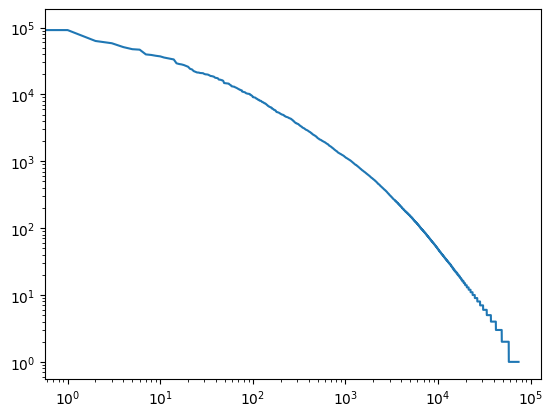

In [8]:
plt.plot([x[1] for x in categoryList], "-")
plt.yscale("log")
plt.xscale("log")

In [10]:
sortedCategories = [x[0] for x in categoryList[:1000]]
sortedCategories.sort()
print("\n".join(sortedCategories))

1-O: REFERÉNDUM 1 DE OCTUBRE
ABORTO
ABUSOS SEXUALES
ACCIDENTES
ACCIDENTES DE TRÁFICO
ACOSO SEXUAL
ACTORES
ACTRICES
ACTUALIDAD
ADA COLAU
ADMINISTRACIÓN AUTONÓMICA
ADMINISTRACIÓN ESTADO
ADMINISTRACIÓN LOCAL
ADMINISTRACIÓN PÚBLICA
ADN
AEMET
AEROPUERTOS
AFGANISTÁN
AGENCIA TRIBUTARIA
AGENDA CULTURAL
AGRESIONES SEXUALES
AGRICULTURA
AGROALIMENTACIÓN
AGUA
AHORA MADRID
AL QAEDA
ALBACETE
ALBERT RIVERA
ALBERTO GARZÓN
ALBERTO NÚÑEZ FEIJÓO
ALCOHOL
ALEMANIA
ALFONSO FERNÁNDEZ MAÑUECO
ALFREDO PÉREZ RUBALCABA
ALICANTE
ALICANTE (CIUDAD)
ALICANTE (PROVINCIA)
ALIMENTACIÓN
ALIMENTOS
ALMERÍA
AMAZON
AMAZON PRIME VIDEO
AMENAZA NUCLEAR
AMOR
AMÉRICA
AMÉRICA LATINA
ANA OBREGÓN
ANA ROSA QUINTANA
ANDALUCÍA
ANDROID
ANGELA MERKEL
ANIMALES
ANTENA 3
ANTONIO DAVID FLORES
APLICACIONES
APPLE
APPS
ARABIA SAUDÍ
ARAGÓN
ARGELIA
ARGENTINA
ARMAS
ARNALDO OTEGI
ARQUEOLOGÍA
ARQUITECTURA
ARTE
ARTES ESCÉNICAS
ARTES PLÁSTICAS
ARTISTAS
ARTUR MAS
ASAMBLEA DE MADRID
ASESINATOS
ASIA
ASISTENCIA SANITARIA
ASTROLOGÍA
ASTRONOMÍA
ASTURIAS
AS

In [8]:
with open("1000temas.txt", "r", encoding="utf-8") as reducedCategoryFile:
    reducedCategoryList = [line.replace("\n", "").split("->") for line in reducedCategoryFile.readlines()]
    reducedCategoryDict = {}
    for category in reducedCategoryList:
        if len(category) == 1:
            reducedCategoryDict[category[0]] = category[0]
        else:
            reducedCategoryDict[category[0]] = category[1]

def updateCategories(categoryList, dict):
    newCategories = []
    for category in categoryList:
        category = category.upper()
        if category in dict.keys() and dict[category] not in newCategories:
            newCategories.append(dict[category])
    if newCategories == []:
        newCategories = None
    return newCategories

total_p = total.copy()

total_p["categories"] = total_p["categories"].apply(lambda x: updateCategories(x, reducedCategoryDict))
total_p = total_p.loc[total_p["categories"].notna()]

In [6]:
def updateCategoriesByNewspaper(row, dict):
    for category in row["categories"]:
        if category not in dict.keys():
            dict[category] = {"El Confidencial": 0,
                              "El Diario": 0,
                              "El Español": 0,
                              "El Mundo": 0,
                              "El País": 0,
                              "La Nueva España": 0,
                              "La Razón": 0,
                              "La Vanguardia": 0,
                              "La Voz de Asturias": 0,
                              "Público": 0,
                              "TOTAL": 0}
        dict[category][row["source"]] = dict[category][row["source"]] + 1
        dict[category]["TOTAL"] = dict[category]["TOTAL"] + 1

In [ ]:
categoriesByNewspaper = {}

total_p.apply(lambda x: updateCategoriesByNewspaper(x, categoriesByNewspaper), axis=1)

categoryByNewspaperMatrix = pd.DataFrame.from_dict(categoriesByNewspaper, orient="index").sort_index()

In [11]:
categoryByNewspaperMatrix

,El Confidencial,El Diario,El Español,El Mundo,El País,La Nueva España,La Razón,La Vanguardia,La Voz de Asturias,Público,TOTAL
AMAZON,116,282,3110,839,335,177,803,0,199,22,5883
TECNOLOGÍA,568,969,6370,63,3967,565,4464,124,0,471,17561
ESTILO DE VIDA,124,12,151,65,1565,41,0,0,0,0,1958
HOGARES,222,0,0,0,0,70,0,0,0,4,296
OBESIDAD,467,140,936,63,153,296,1872,0,105,1,4033
...,...,...,...,...,...,...,...,...,...,...,...
RESTRINGIDO,0,0,0,0,0,0,5396,0,0,0,5396
PLANO,0,0,0,0,0,0,0,233,0,0,233
DELS,0,0,0,0,0,0,0,365,0,0,365
PLAY OFF,0,0,0,0,0,0,0,0,725,0,725


In [10]:
def saveAsJSON(df, filename, n=np.inf):
    pd.concat([
        df.loc[df["source"]=="El Confidencial"].sample(int(np.min((n, np.sum(df["source"]=="El Confidencial"))))),
        df.loc[df["source"]=="El Diario"].sample(int(np.min((n, np.sum(df["source"]=="El Diario"))))),
        df.loc[df["source"]=="El Español"].sample(int(np.min((n, np.sum(df["source"]=="El Español"))))),
        df.loc[df["source"]=="El Mundo"].sample(int(np.min((n, np.sum(df["source"]=="El Mundo"))))),
        df.loc[df["source"]=="El País"].sample(int(np.min((n, np.sum(df["source"]=="El País"))))),
        df.loc[df["source"]=="La Nueva España"].sample(int(np.min((n, np.sum(df["source"]=="La Nueva España"))))),
        df.loc[df["source"]=="La Razón"].sample(int(np.min((n, np.sum(df["source"]=="La Razón"))))),
        df.loc[df["source"]=="La Vanguardia"].sample(int(np.min((n, np.sum(df["source"]=="La Vanguardia"))))),
        df.loc[df["source"]=="La Voz de Asturias"].sample(int(np.min((n, np.sum(df["source"]=="La Voz de Asturias"))))),
        df.loc[df["source"]=="Público"].sample(int(np.min((n, np.sum(df["source"]=="Público")))))
    ],ignore_index=True).to_json(filename, orient="records", lines=True)

In [11]:
saveAsJSON(total_p, "processed_14k.jsonl", 14407)
saveAsJSON(total_p, "processed_100k.jsonl", 100000)
saveAsJSON(total_p, "processed_all.jsonl")

In [14]:
mainCategoryList = ["ABORTO", "DROGAS", "PSOE", "PP", "VOX", "CIUDADANOS", "JUNTS", "IU", "EH BILDU", "TERRORISMO", "INDEPENDENTISMO", "SINDICATOS", "COVID-19", "GUERRA EN UCRANIA", "IMPUESTOS", "CAMBIO CLIMÁTICO", "INDEPENDENTISMO", "YIHADISMO", "TERRORISMO", "FRANQUISMO", "CRISTIANISMO", "CASA REAL", "TOROS", "INMIGRACIÓN", "PODEMOS", "ERC", "PNV", "SINDICATOS"]

In [15]:
def extractMainCategories(categories, mainCategoryList):
    mainCategories = []

    for category in categories:
        if category in mainCategoryList:
            mainCategories.append(category)
    
    if len(mainCategories) == 0:
        mainCategories = None
    
    return mainCategories

total_p_maincategories = total_p.copy()
total_p_maincategories["categories"] = total_p_maincategories["categories"].apply(lambda x: extractMainCategories(x, mainCategoryList))
total_p_maincategories = total_p_maincategories.loc[total_p_maincategories["categories"].notna()]

In [29]:
total_p_maincategories["source"].value_counts()

source
La Razón              94665
El Mundo              65058
El Español            51549
El País               31343
La Voz de Asturias    23907
La Nueva España       14748
El Diario             12387
La Vanguardia          4493
Público                3764
El Confidencial        1734
Name: count, dtype: int64

In [7]:
mainCategoriesByNewspaper = {}

total_p_maincategories.apply(lambda x: updateCategoriesByNewspaper(x, mainCategoriesByNewspaper), axis=1)

mainCategoriesByNewspaperMatrix = pd.DataFrame.from_dict(mainCategoriesByNewspaper, orient="index").sort_index()

In [12]:
mainCategoriesByNewspaperMatrix

,El Confidencial,El Diario,El Español,El Mundo,El País,La Nueva España,La Razón,La Vanguardia,La Voz de Asturias,Público,TOTAL
ABORTO,6,125,191,187,282,120,597,0,59,48,1615
CAMBIO CLIMÁTICO,213,375,912,439,2176,628,1808,0,527,10,7088
CASA REAL,34,161,3220,2210,730,424,5903,175,1112,65,14034
CIUDADANOS,46,152,3677,8324,592,526,3657,833,2356,106,20269
COVID-19,17,2207,10373,15035,2285,458,18342,0,4604,570,53891
CRISTIANISMO,97,210,1596,933,2313,203,2697,26,455,120,8650
DROGAS,139,71,860,396,838,326,1362,0,0,24,4016
EH BILDU,5,451,437,671,99,210,1009,148,126,29,3185
ERC,5,93,201,3788,643,623,2063,900,1252,12,9580
FRANQUISMO,68,494,867,0,515,87,684,71,175,187,3148


In [30]:
saveAsJSON(total_p_maincategories, "processed_maincategories_1k7.jsonl", 1734)
saveAsJSON(total_p_maincategories, "processed_maincategories_12k.jsonl", 12387)
saveAsJSON(total_p_maincategories, "processed_maincategories_all.jsonl")

In [ ]:
mainCategoriesByNewspaperMatrix.to_csv("articles_category_source.csv")